In [1]:

import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%matplotlib inline

import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

import pybedtools

facet_kws = dict(col='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 col_order=study.phenotype_order, size=2)


folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 10:37:57	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-05-13 10:37:57	Parsing datapackage to create a Study object
2016-05-13 10:38:30	Initializing Study
2016-05-13 10:38:30	Initializing Predictor configuration manager for Study
2016-05-13 10:38:30	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 10:38:30	Added ExtraTreesClassifier to default predictors
2016-05-13 10:38:30	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 10:38:30	Added ExtraTreesRegressor to default predictors
2016-05-13 10:38:30	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 10:38:30	Added GradientBoostingClassifier to default predictors
2016-05-13 10:38:30	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1316
           excluded         1175
           included         2995
           uncategorized       2
NPC        bimodal          2325
           excluded         1732
           included         4597
           uncategorized       4
iPSC       bimodal          3438
           excluded         2293
           included         6105
           middle              1
           uncategorized      34
dtype: int64

In [7]:
study.splicing.minimum_samples

10

In [16]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
print len(singles_no_outliers)

splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
ten_per_celltype = (splicing_singles_count >= 10).any(axis=0)
splicing10 = study.splicing.data[ten_per_celltype[ten_per_celltype].index]
print splicing10.shape

181
(204, 12894)


In [17]:
study.supplemental.modalities_tidy = study.supplemental.modalities_tidy.replace(
    {'modality': {'ambivalent': 'uncategorized', 'concurrent': 'middle'}})

In [18]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1316
           excluded         1175
           included         2995
           uncategorized       2
NPC        bimodal          2325
           excluded         1732
           included         4597
           uncategorized       4
iPSC       bimodal          3438
           excluded         2293
           included         6105
           middle              1
           uncategorized      34
dtype: int64

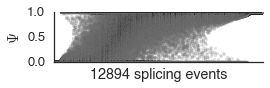

In [19]:
fig, ax = plt.subplots(figsize=(4, 1.5))
flotilla.visualize.splicing.lavalamp(splicing10, color='grey', ax=ax, markersize=3)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing_10_per_celltype_lavalamp_all.png'.format(folder))